# PIK3CA: Effects of Hotspot Mutation on AKT1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

### Import CPTAC

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [4]:
protein = 'AKT1'
gene = 'PIK3CA'

## Extract the data for hotspot mutations only 

In [5]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [6]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
#print(p10_mutations)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(len(p10_mutations.loc[(p10_mutations['Within_Hotspot'] == True)]))

19


## Hotspot mutation vs non-hotspot mutation

In [7]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=-0.8537826756974813, pvalue=0.39764976429801524)


## Hotspot mutation vs other mutations and wildtype

In [8]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-0.7070458734351901, pvalue=0.481215853185884)


## All mutations vs wildtype

In [9]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-0.2511526174289215, pvalue=0.8022219785434666)


## Hotspot mutation v wildtype

In [10]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-0.5786084446758856, pvalue=0.5647373471984232)


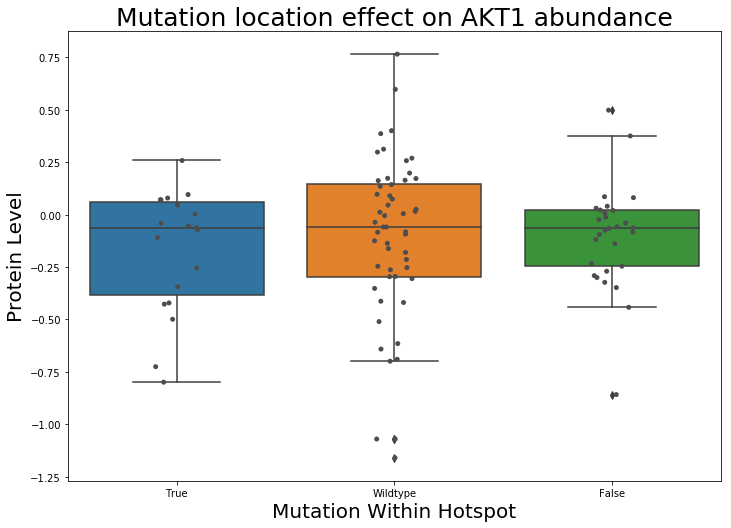

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on AKT1 abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [12]:
phos_mutations = CPTAC.compare_mutations(phos, protein, gene)
phos_mutations['Within_Hotspot'] = False
phos_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True

phos_mutations.loc[phos_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
print(phos_mutations)


phos_mutations = phos_mutations.loc[phos_mutations['Patient_Type'] == 'Tumor']
#phos_mutations = phos_mutations.dropna(axis = 0)
#print(phos_mutations)
phos_sites = list(phos_mutations)
phos_sites = phos_sites[:(len(phos_sites) - 3)]

      AKT1-S122  AKT1-S124  AKT1-S126  AKT1-S129  AKT1-T450  AKT1S1-S108  \
S001        NaN   -0.04605   0.148100   -0.04605        NaN      0.08790   
S002   -0.25000   -0.26300  -0.121000   -0.18550   -0.00876      0.45250   
S003        NaN    0.21400   0.050500    0.03195        NaN          NaN   
S004        NaN   -0.36800   0.320000   -0.36800        NaN      0.34800   
S005        NaN   -0.00300  -0.028200    0.04540        NaN      0.78900   
S006        NaN   -0.18965  -0.039300   -0.07715   -0.30100      0.05250   
S007    0.21700    0.16500   0.228000    0.06200   -0.33000     -0.25150   
S008        NaN    0.08425  -0.020100    0.08425    0.35100      0.01410   
S009        NaN   -0.04670   0.575000   -0.05300        NaN      0.17800   
S010        NaN    0.09905   0.245000    0.22750   -0.28800     -0.39620   
S011        NaN   -0.16100  -0.298000    0.17900        NaN      0.15370   
S012        NaN   -0.08310  -0.134100   -0.17400    0.25800     -0.21500   
S013    0.03

## Hotspot mutation vs non-hotspot mutation

In [13]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print(ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

Ttest_indResult(statistic=-0.8534153267719324, pvalue=0.4134039258620623)
Ttest_indResult(statistic=-0.1510866674892238, pvalue=0.8805979220010304)
Ttest_indResult(statistic=-0.32228755133547393, pvalue=0.7486950797373193)
Ttest_indResult(statistic=-0.5402410073844253, pvalue=0.5916370158032049)
Ttest_indResult(statistic=-0.08328974036684449, pvalue=0.9363304389555672)
Ttest_indResult(statistic=0.6606555061045439, pvalue=0.5123573014712827)
Ttest_indResult(statistic=0.44536815083568926, pvalue=0.6582879131984016)
Ttest_indResult(statistic=0.6184520684792894, pvalue=0.5395397817295606)
Ttest_indResult(statistic=0.5399610441226037, pvalue=0.5918285139058572)
Ttest_indResult(statistic=-0.7915644558275129, pvalue=0.43267755057076984)
Ttest_indResult(statistic=-1.2176669418317165, pvalue=0.22999057140955442)
Ttest_indResult(statistic=0.28457518632109896, pvalue=0.7772468446134322)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=2.465382814785304, pvalue=0.02396876852076

/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Hotspot mutation vs other mutations and wildtype

In [15]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] != True]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print(site, " ", ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

AKT1-S122   Ttest_indResult(statistic=-0.6749600481141201, pvalue=0.5054404997224948)
AKT1-S124   Ttest_indResult(statistic=0.4265859663672477, pvalue=0.6706774689768096)
AKT1-S126   Ttest_indResult(statistic=-0.31586496562809696, pvalue=0.7527767230674126)
AKT1-S129   Ttest_indResult(statistic=-0.4938343180489354, pvalue=0.6225282061459592)
AKT1-T450   Ttest_indResult(statistic=-0.11002864419500724, pvalue=0.9137549205077822)
AKT1S1-S108   Ttest_indResult(statistic=0.9695216644455938, pvalue=0.33482696618643604)
AKT1S1-S112   Ttest_indResult(statistic=0.6906735819356236, pvalue=0.4915096035432561)
AKT1S1-S203   Ttest_indResult(statistic=0.8048832738085051, pvalue=0.4229849931760118)
AKT1S1-S222   Ttest_indResult(statistic=0.827600524505859, pvalue=0.40990754364672066)
AKT1S1-S223   Ttest_indResult(statistic=-0.6039414287472955, pvalue=0.5472780915404707)
AKT1S1-S231   Ttest_indResult(statistic=-1.4177903470241435, pvalue=0.15963014107690238)
AKT1S1-S232   Ttest_indResult(statistic=0.1

## All mutations vs wildtype

In [16]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] != 'Wildtype']
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print(site, " ", ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

AKT1-S122   Ttest_indResult(statistic=-0.1426023538034131, pvalue=0.8876630902633182)
AKT1-S124   Ttest_indResult(statistic=0.9827426252158707, pvalue=0.328311517829847)
AKT1-S126   Ttest_indResult(statistic=-0.10926216465664161, pvalue=0.9132179738567242)
AKT1-S129   Ttest_indResult(statistic=-0.1386331338666262, pvalue=0.890024535674317)
AKT1-T450   Ttest_indResult(statistic=-0.10653731552431255, pvalue=0.9164804122821995)
AKT1S1-S108   Ttest_indResult(statistic=0.7559869517354699, pvalue=0.4515883979062073)
AKT1S1-S112   Ttest_indResult(statistic=0.5909704583428445, pvalue=0.5559893438000477)
AKT1S1-S203   Ttest_indResult(statistic=0.6786017304470668, pvalue=0.4991123864336626)
AKT1S1-S222   Ttest_indResult(statistic=0.6446685260059515, pvalue=0.5206482315169443)
AKT1S1-S223   Ttest_indResult(statistic=0.21613147785093886, pvalue=0.8293345010001284)
AKT1S1-S231   Ttest_indResult(statistic=-0.5684215644451166, pvalue=0.5711336212807929)
AKT1S1-S232   Ttest_indResult(statistic=-0.1543

## Hotspot mutation v wildtype

In [17]:
p_values = []
site_names = []

for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print(site, " ", ttest)
    p_values.append(ttest[1])
    site_names.append(site) 
    
    
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))


#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

AKT1-S122   Ttest_indResult(statistic=-0.8534153267719324, pvalue=0.4134039258620623)
AKT1-S124   Ttest_indResult(statistic=-0.1510866674892238, pvalue=0.8805979220010304)
AKT1-S126   Ttest_indResult(statistic=-0.32228755133547393, pvalue=0.7486950797373193)
AKT1-S129   Ttest_indResult(statistic=-0.5402410073844253, pvalue=0.5916370158032049)
AKT1-T450   Ttest_indResult(statistic=-0.08328974036684449, pvalue=0.9363304389555672)
AKT1S1-S108   Ttest_indResult(statistic=0.6606555061045439, pvalue=0.5123573014712827)
AKT1S1-S112   Ttest_indResult(statistic=0.44536815083568926, pvalue=0.6582879131984016)
AKT1S1-S203   Ttest_indResult(statistic=0.6184520684792894, pvalue=0.5395397817295606)
AKT1S1-S222   Ttest_indResult(statistic=0.5399610441226037, pvalue=0.5918285139058572)
AKT1S1-S223   Ttest_indResult(statistic=-0.7915644558275129, pvalue=0.43267755057076984)
AKT1S1-S231   Ttest_indResult(statistic=-1.2176669418317165, pvalue=0.22999057140955442)
AKT1S1-S232   Ttest_indResult(statistic=0

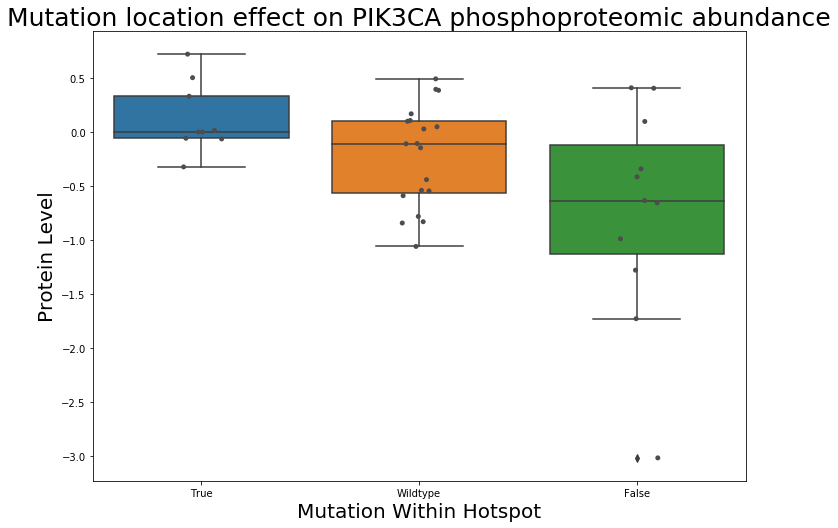

In [19]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = phos_mutations, x = 'Within_Hotspot', y = 'AKT1S1-S267', ax = ax)
boxplt = sns.stripplot(data = phos_mutations, x = 'Within_Hotspot', y = 'AKT1S1-S267', jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PIK3CA phosphoproteomic abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()